In [1]:
import requests
import json
import pandas as pd
import numpy as np

In [7]:
! pip install openpyxl

     -------------------------------------- 242.1/242.1 KB 3.7 MB/s eta 0:00:00


## 結果データを取得する

In [2]:
def getResultData(id):
    try:
        response = requests.get(f'https://oyster-app-8jboe.ondigitalocean.app/therb/{id}')
        #response = requests.get(f'http://localhost:5000/therb/{id}')
        data = json.loads(response.text)
        
        #jsonデータをpandasのdataframeに変換する
        return data['data']
    except:
        throw('no id matches data in database')

getResultDataに渡すidはtherb-frontendのUIのここから取得できます
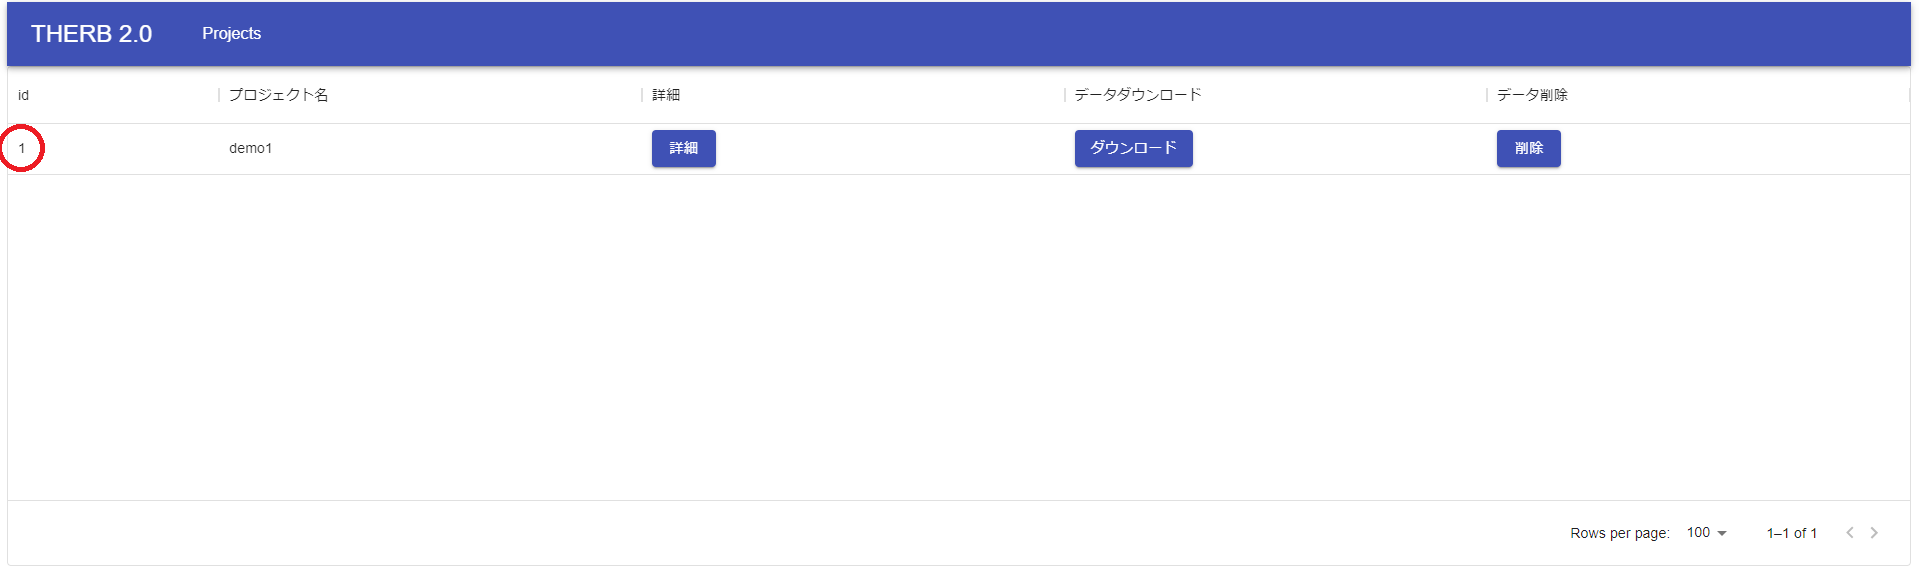

In [3]:
resultDataList = getResultData(1)

In [27]:
threeZoneList = getResultData(6)

In [4]:
resultDataList

[{'roomId': 'outdoor',
  'results': {'time': ['01/05/24:00',
    '01/06/01:00',
    '01/06/02:00',
    '01/06/03:00',
    '01/06/04:00',
    '01/06/05:00',
    '01/06/06:00',
    '01/06/07:00',
    '01/06/08:00',
    '01/06/09:00',
    '01/06/10:00',
    '01/06/11:00',
    '01/06/12:00',
    '01/06/13:00',
    '01/06/14:00',
    '01/06/15:00',
    '01/06/16:00',
    '01/06/17:00',
    '01/06/18:00',
    '01/06/19:00',
    '01/06/20:00',
    '01/06/21:00',
    '01/06/22:00',
    '01/06/23:00',
    '01/06/24:00',
    '01/07/01:00',
    '01/07/02:00',
    '01/07/03:00',
    '01/07/04:00',
    '01/07/05:00',
    '01/07/06:00',
    '01/07/07:00',
    '01/07/08:00',
    '01/07/09:00',
    '01/07/10:00',
    '01/07/11:00',
    '01/07/12:00',
    '01/07/13:00',
    '01/07/14:00',
    '01/07/15:00',
    '01/07/16:00',
    '01/07/17:00',
    '01/07/18:00',
    '01/07/19:00',
    '01/07/20:00',
    '01/07/21:00',
    '01/07/22:00',
    '01/07/23:00',
    '01/07/24:00',
    '01/08/01:00',
    '01/

部屋ごとにデータを整理できるようにする必要

In [5]:
def convertToDataframe(resultDict):
    columns = []
    rows = []
    for k,v in resultDict.items():
        columns.append(k)
        rows.append(v)
    
    #transposedRows = np.array(rows,dtype=np.float32).T
    transposedRows = np.array(rows).T
    
    df = pd.DataFrame(data = transposedRows, columns = columns) 
    df=df.set_index('time')
    #df.to_excel("test.xlsx")
    #return df
    df=df.astype('float32')
    return df

In [8]:
df_outdoor=convertToDataframe(resultDataList[0]["results"])
df_room1=convertToDataframe(resultDataList[1]["results"])
df_room2=convertToDataframe(resultDataList[2]["results"])

In [16]:
dfDict = {}
tempData = []
columns=[]
for resultData in resultDataList:
    df = convertToDataframe(resultData["results"])
    dfDict[resultData["roomId"]]=df
    tempData.append(df["temp"])
    columns.append(resultData["roomId"])

In [28]:
def compareDataPlot(resultDataList,columnName):
    tempData = []
    columns=[]
    for resultData in resultDataList:
        df = convertToDataframe(resultData["results"])
        tempData.append(df[columnName])
        columns.append(resultData["roomId"])
    df=pd.concat(tempData,axis=1)
    df.columns = columns
    
    ax=df[1:168].plot(figsize=(20,10))
    ax.set_ylabel("Temperature[degC]")

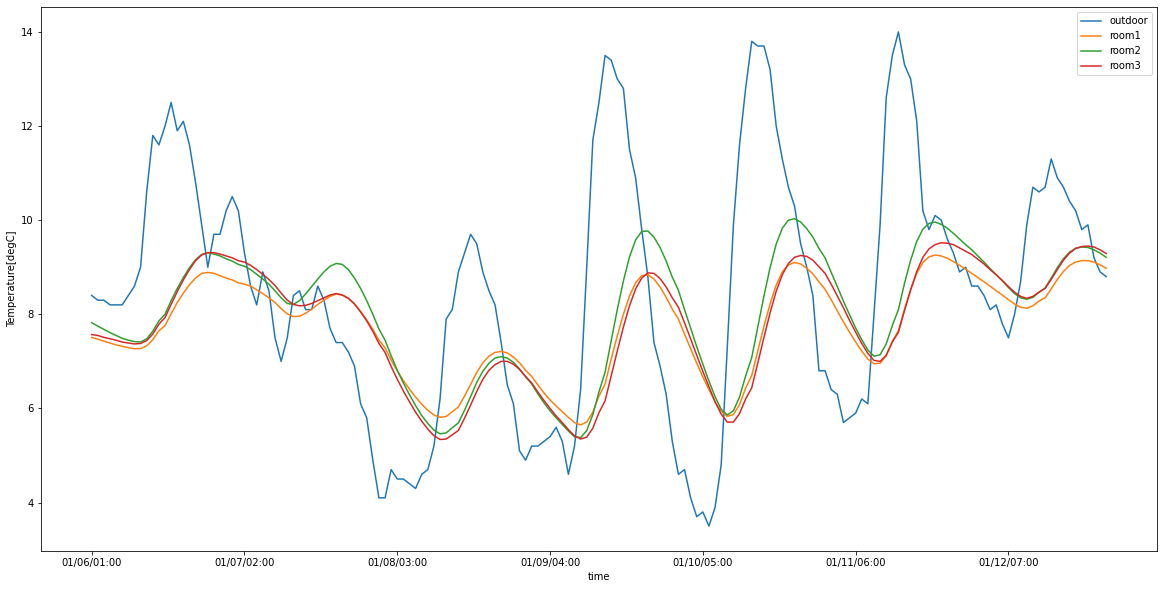

In [30]:
compareDataPlot(threeZoneList,"temp")

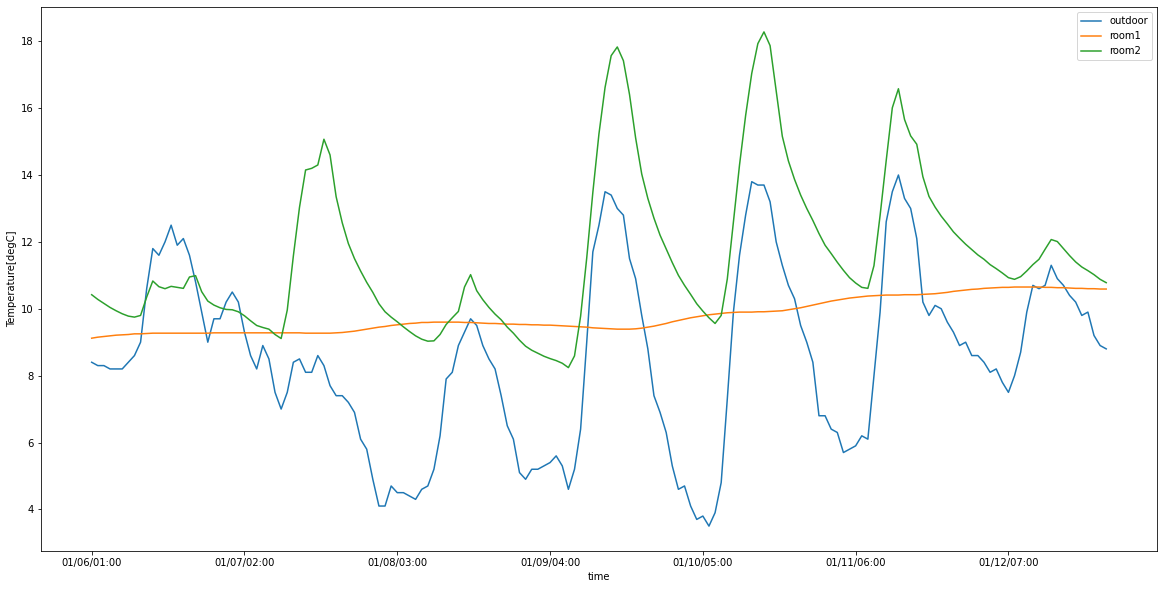

In [31]:
compareDataPlot(resultDataList,"temp")

In [22]:
tempDf=pd.concat(tempData,axis=1)
tempDf.columns = columns

Text(0, 0.5, 'Temperature')

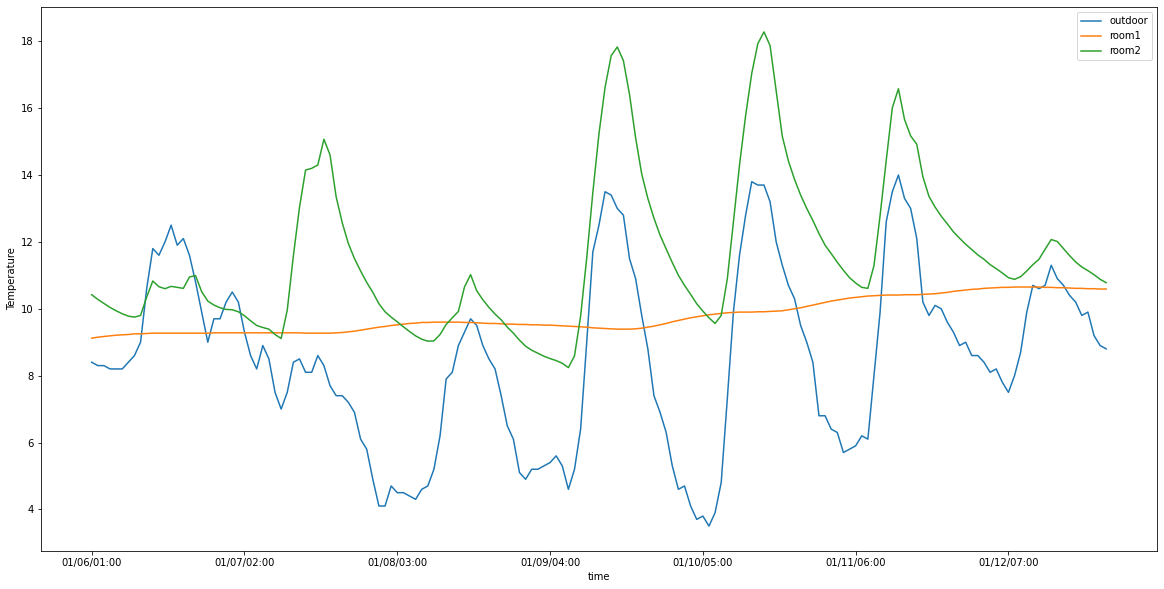

In [26]:
ax=tempDf[1:168].plot(figsize=(20,10))
ax.set_ylabel("Temperature[degC]")

## とりあえず折れ線グラフで可視化してみる

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

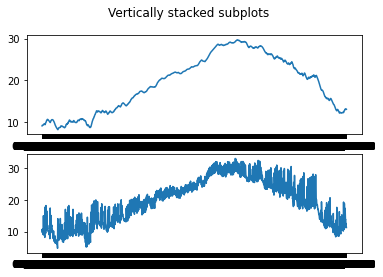

In [24]:
fig, axs = plt.subplots(1)
fig.suptitle('Vertically stacked subplots')
axs[0].plot(df_room1.index,df_room1["temp"])
axs[0].plot(df_room2.index,df_room2["temp"])
plt.savefig('test.png')

In [ ]:
def drawLineChart(resultData):
    for resultData in resultDataList:
        

### データをすぐに確認するのはpandasのほうが早い

<AxesSubplot:xlabel='time'>

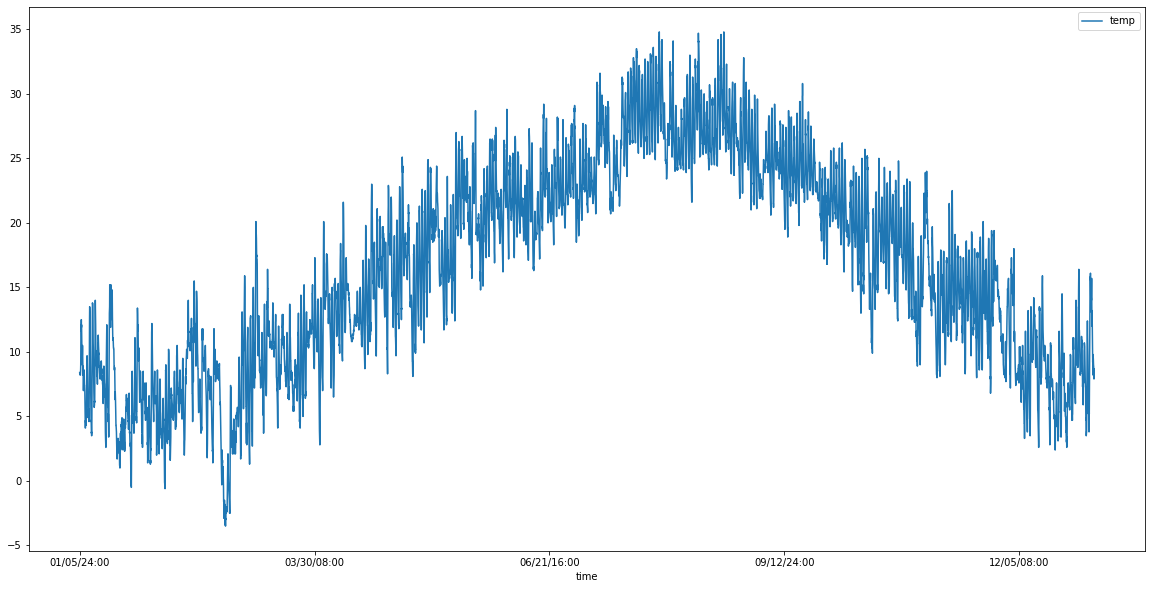

In [19]:
df_outdoor[['temp']].plot.line(figsize=(20,10))

<AxesSubplot:xlabel='time'>

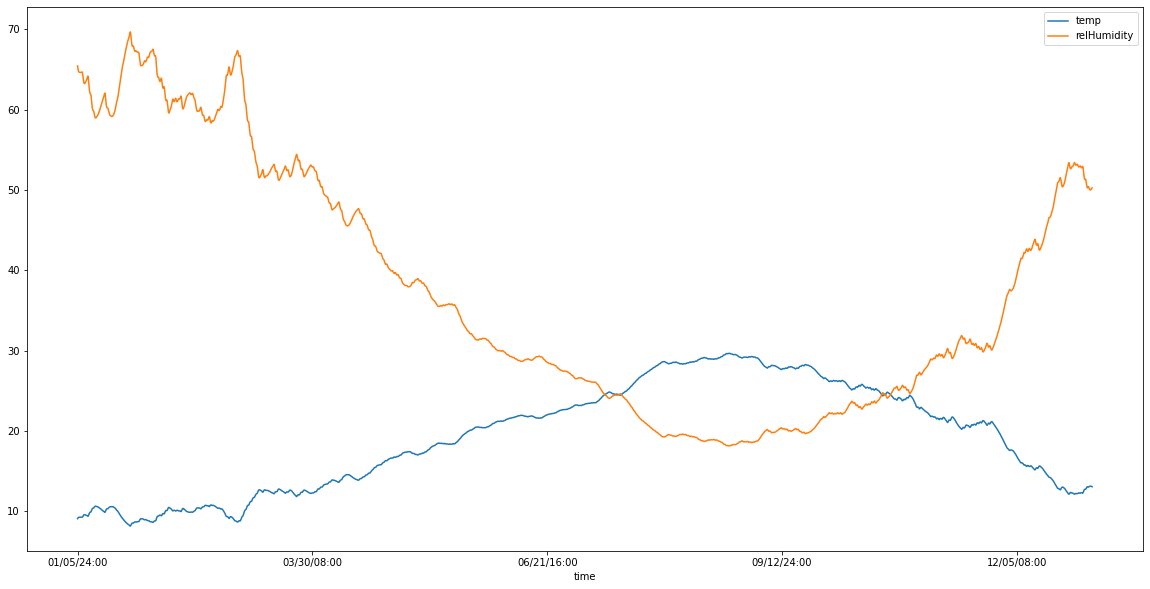

In [14]:
df_room1[['temp','relHumidity']].plot.line(figsize=(20,10))

<AxesSubplot:xlabel='time'>

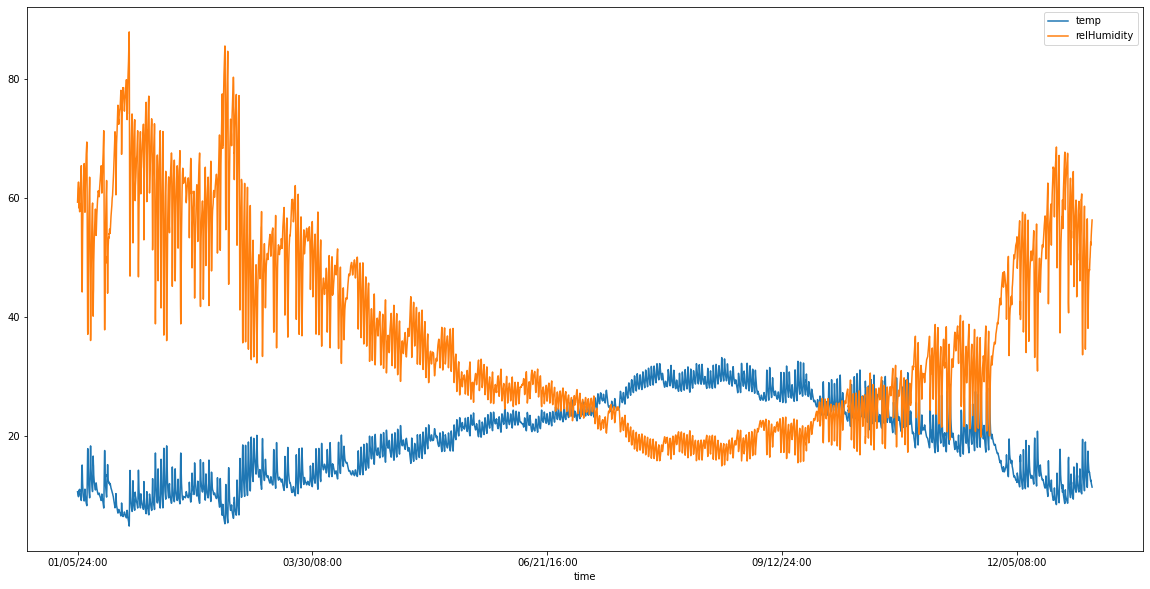

In [17]:
df_room2[['temp','relHumidity']].plot.line(figsize=(20,10))

どの温度の時間帯が多いか？

<AxesSubplot:xlabel='hour'>

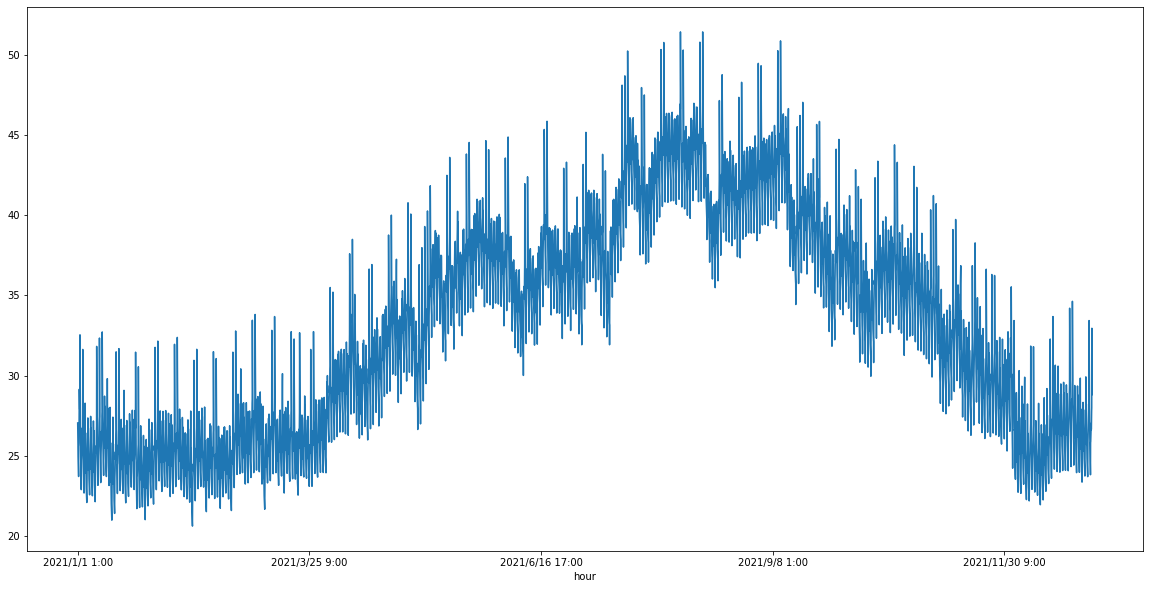

In [40]:
df_room2['roomT'].plot.line(figsize=(20,10))

<AxesSubplot:>

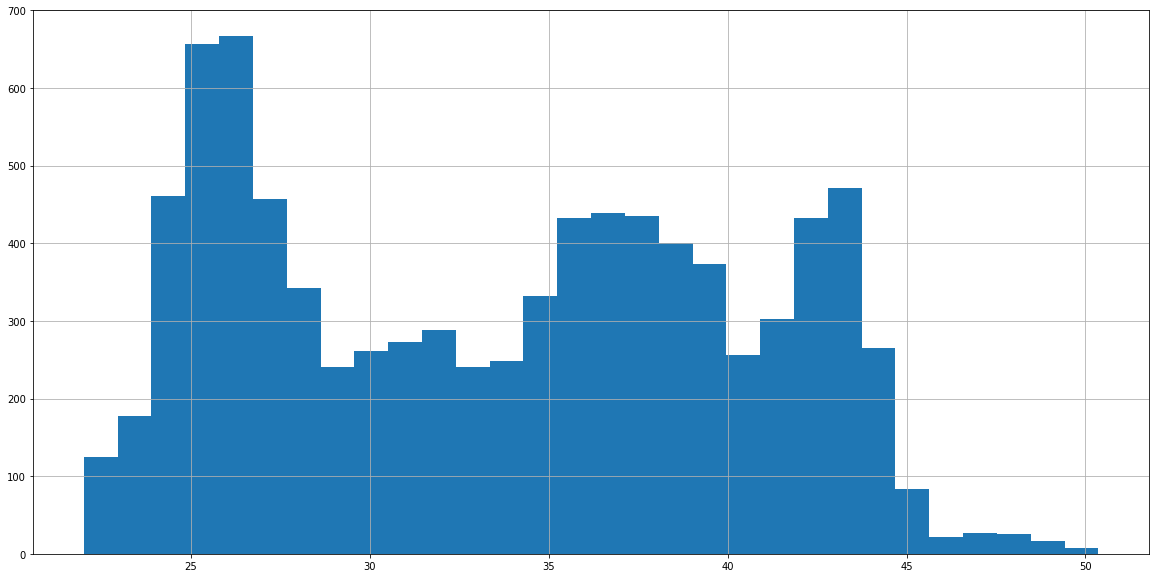

In [42]:
df_room1['roomT'].hist(figsize=(20,10),bins=30)

### 快適時間帯の割合は？

In [43]:
def calcPercentage(data,min,max):
    maxSatisfied = data[lambda x: x<max]
    satisfied = maxSatisfied[lambda x: x>min]
    percentage = len(satisfied)/len(data)*100
    return round(percentage,1)

In [44]:
calcPercentage(df_room1['roomT'],20,28)

30.5

In [45]:
calcPercentage(df_room2['roomT'],20,28)

31.3

In [46]:
calcPercentage(df_room3['roomT'],20,28)

66.0

### visualizeの見栄えをよくする

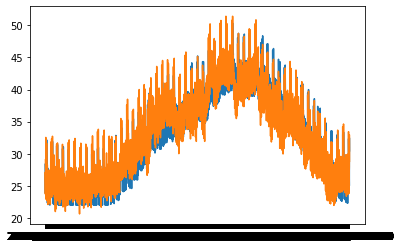

In [33]:
plt.plot(df_room1.index,df_room1['roomT'],label = "room1")
plt.plot(df_room2.index,df_room2['roomT'],label = "room2")

#### Seabornは時間がかかりすぎ

<AxesSubplot:xlabel='hour', ylabel='roomT'>

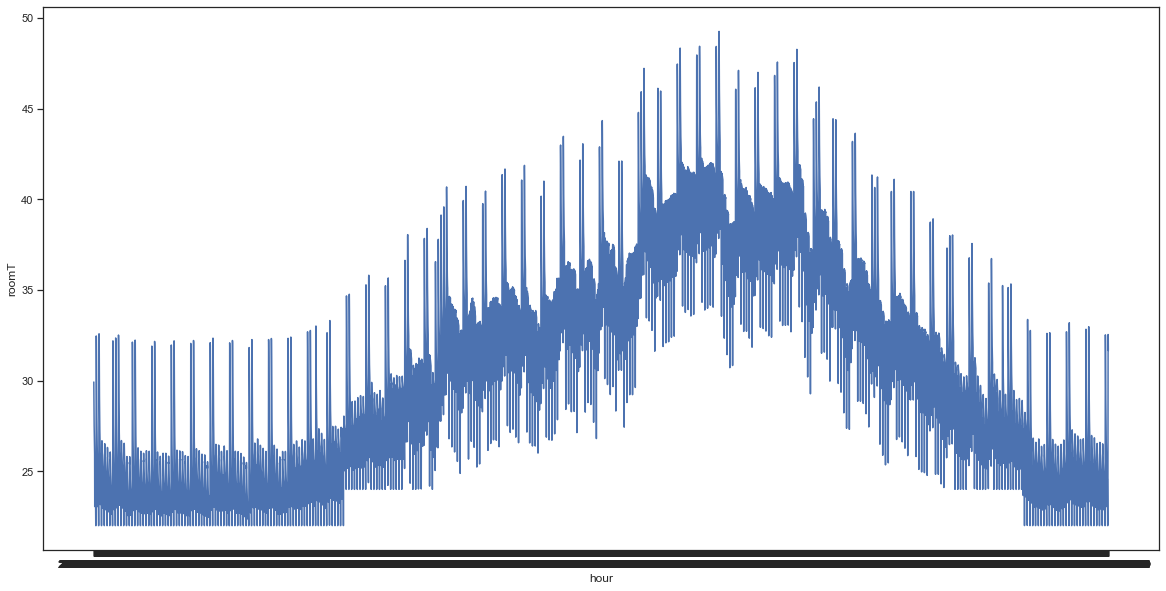

In [104]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=df, x="hour", y="roomT")